In [1]:
import os
from IPython.display import Image, display

In [2]:
!nvidia-smi

Thu Oct 24 13:35:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!mkdir /content/Pothole

In [4]:
%cd /content/Pothole

/content/Pothole


In [5]:
HOME = os.getcwd()
print(HOME)

/content/Pothole


In [7]:
!mkdir {HOME}/datasets

In [8]:
%cd {HOME}/datasets

/content/Pothole/datasets


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("hiteshram").project("object-detection-bounding-box-ftfs5")
dataset = project.version(1).download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-(Bounding-Box)-1 in yolov5pytorch:: 100%|██████████| 800/800 [00:00<00:00, 5460.75it/s]


In [11]:
%cd {HOME}

/content/Pothole


In [12]:
%cd {dataset.location}

/content/Pothole/datasets/Object-Detection-(Bounding-Box)-1


In [15]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 49.8 MB/s eta 0:00:00


In [16]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data="/content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/data.yaml" epochs=75 imgsz=640

/content/Pothole
100% 49.7M/49.7M [00:00<00:00, 148MB/s]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

In [18]:
!ls {HOME}//runs/detect/train

args.yaml					    P_curve.png		 train_batch1496.jpg
confusion_matrix_normalized.png			    PR_curve.png	 train_batch1497.jpg
confusion_matrix.png				    R_curve.png		 train_batch1.jpg
events.out.tfevents.1729777981.07ef33cfb222.5230.0  results.csv		 train_batch2.jpg
F1_curve.png					    results.png		 val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					    train_batch1495.jpg  weights


/content/Pothole


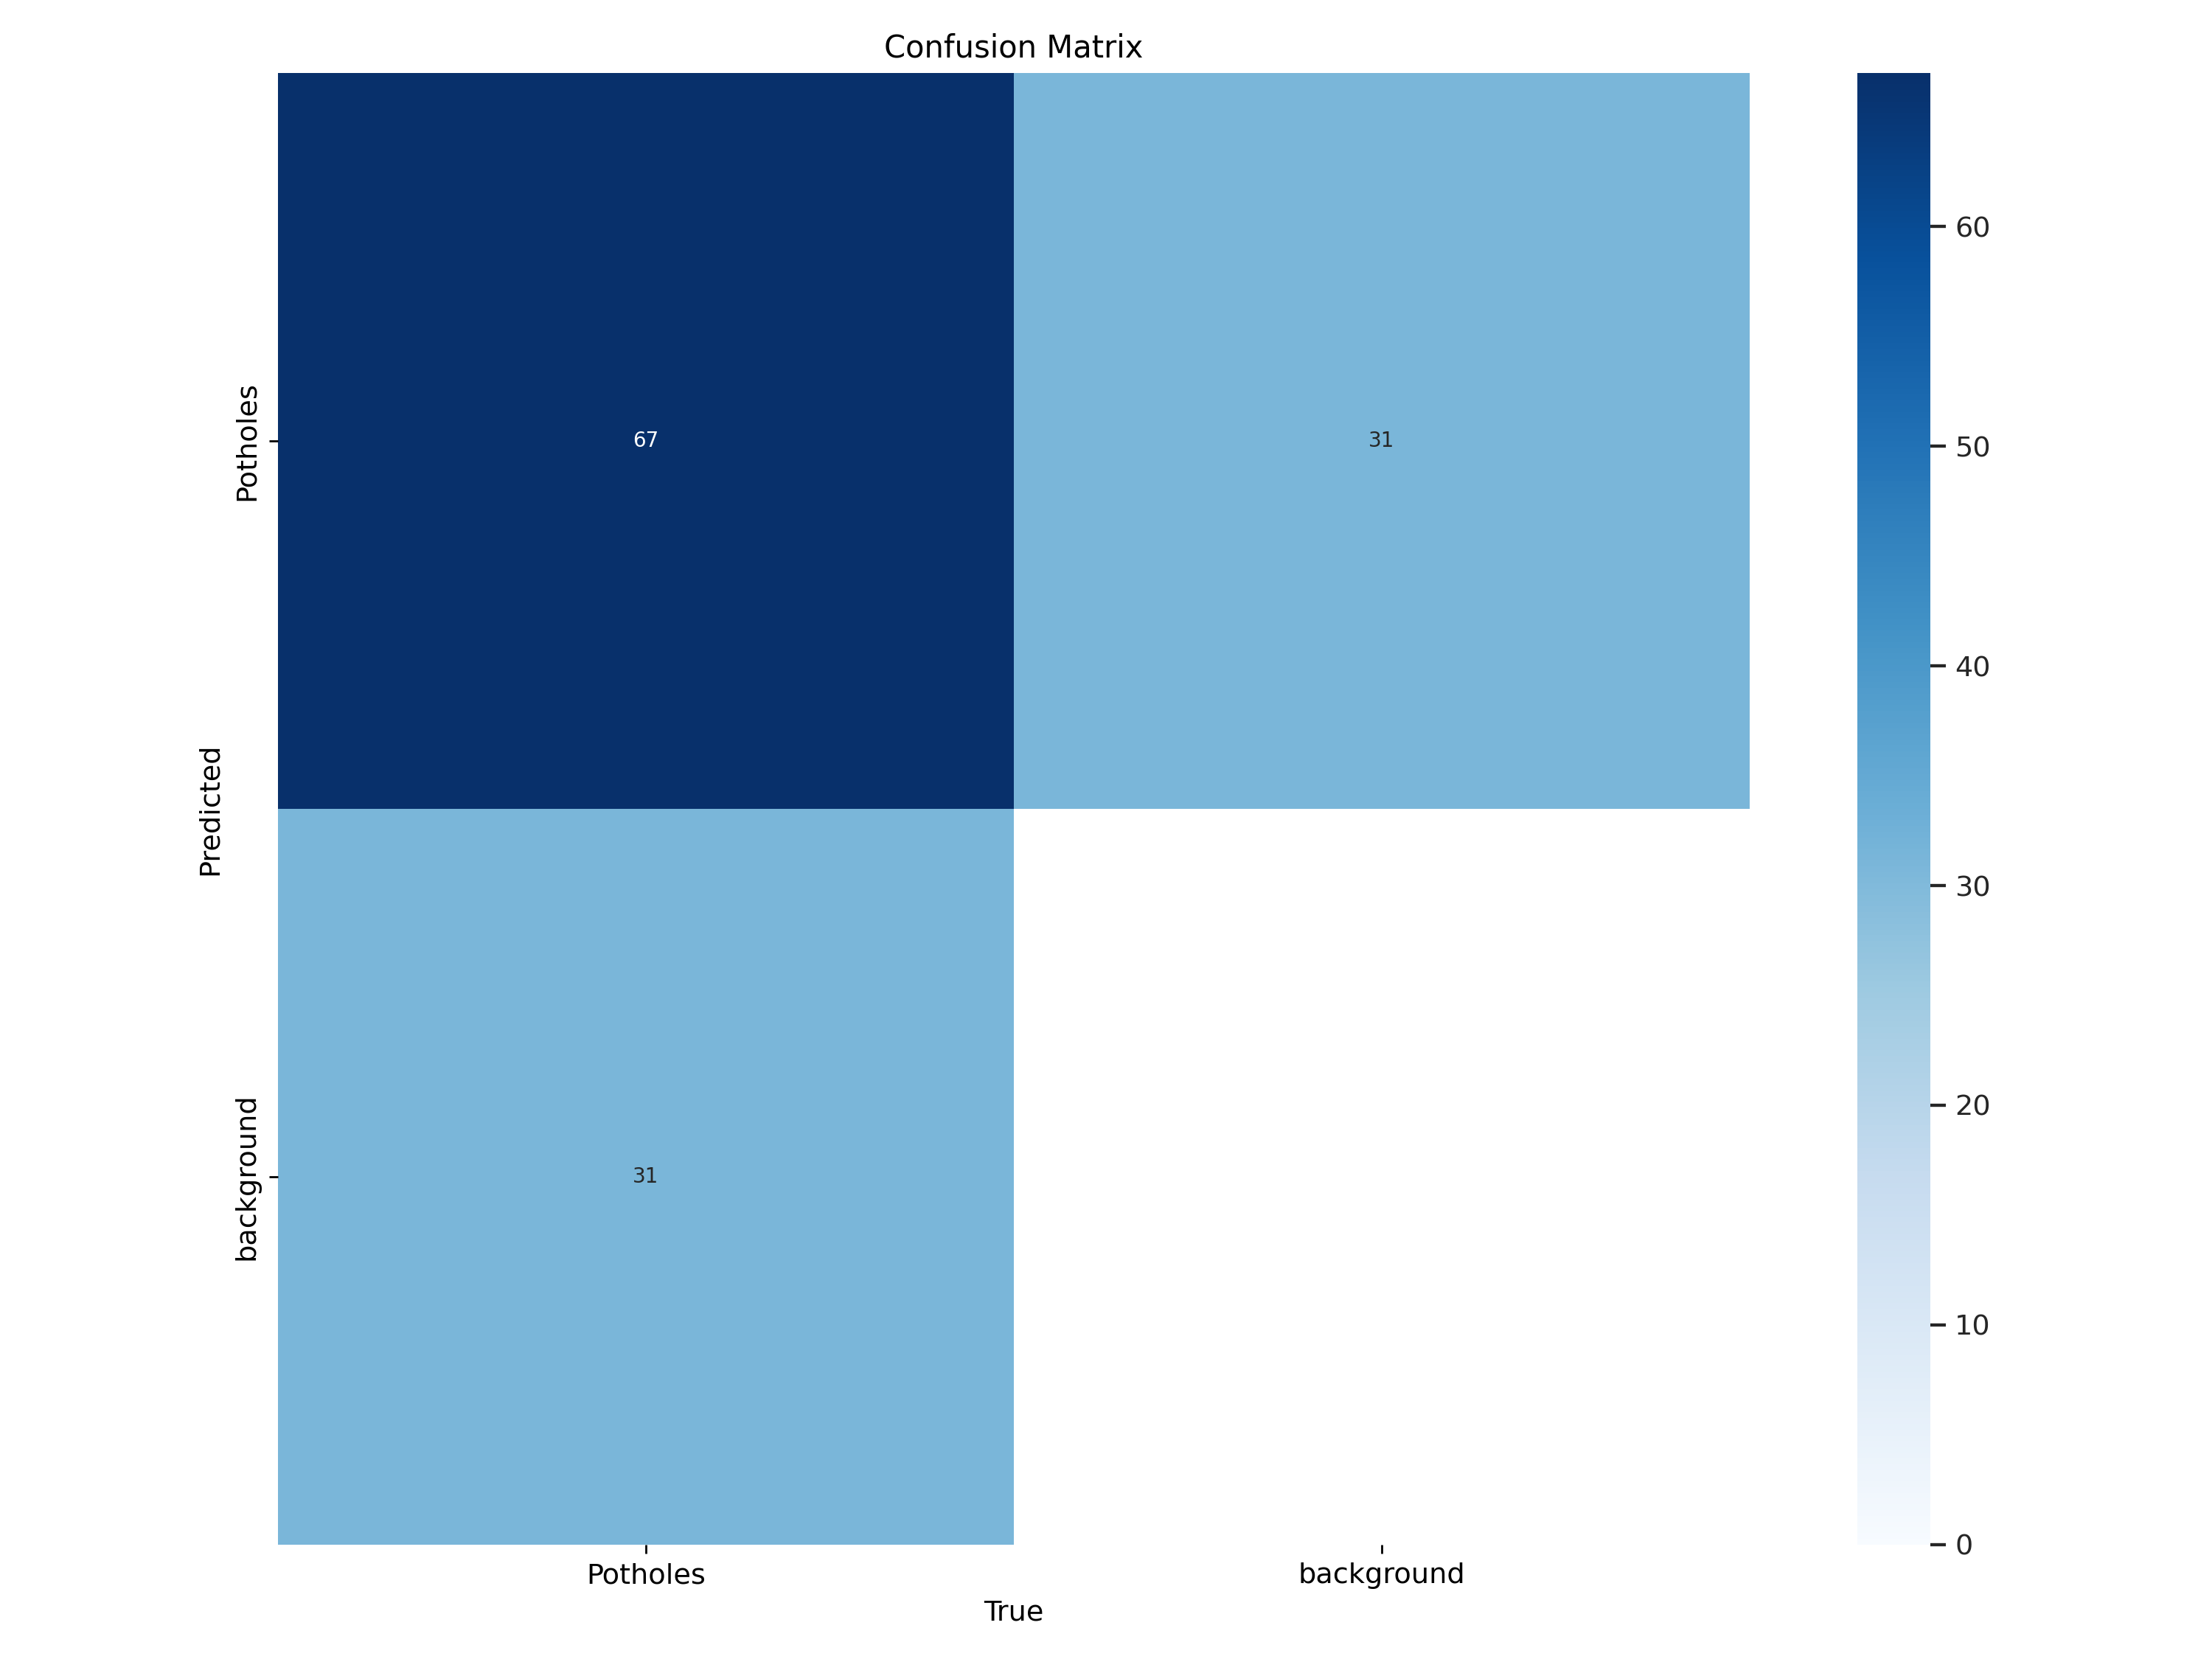

In [19]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/confusion_matrix.png', width = 900)

/content/Pothole


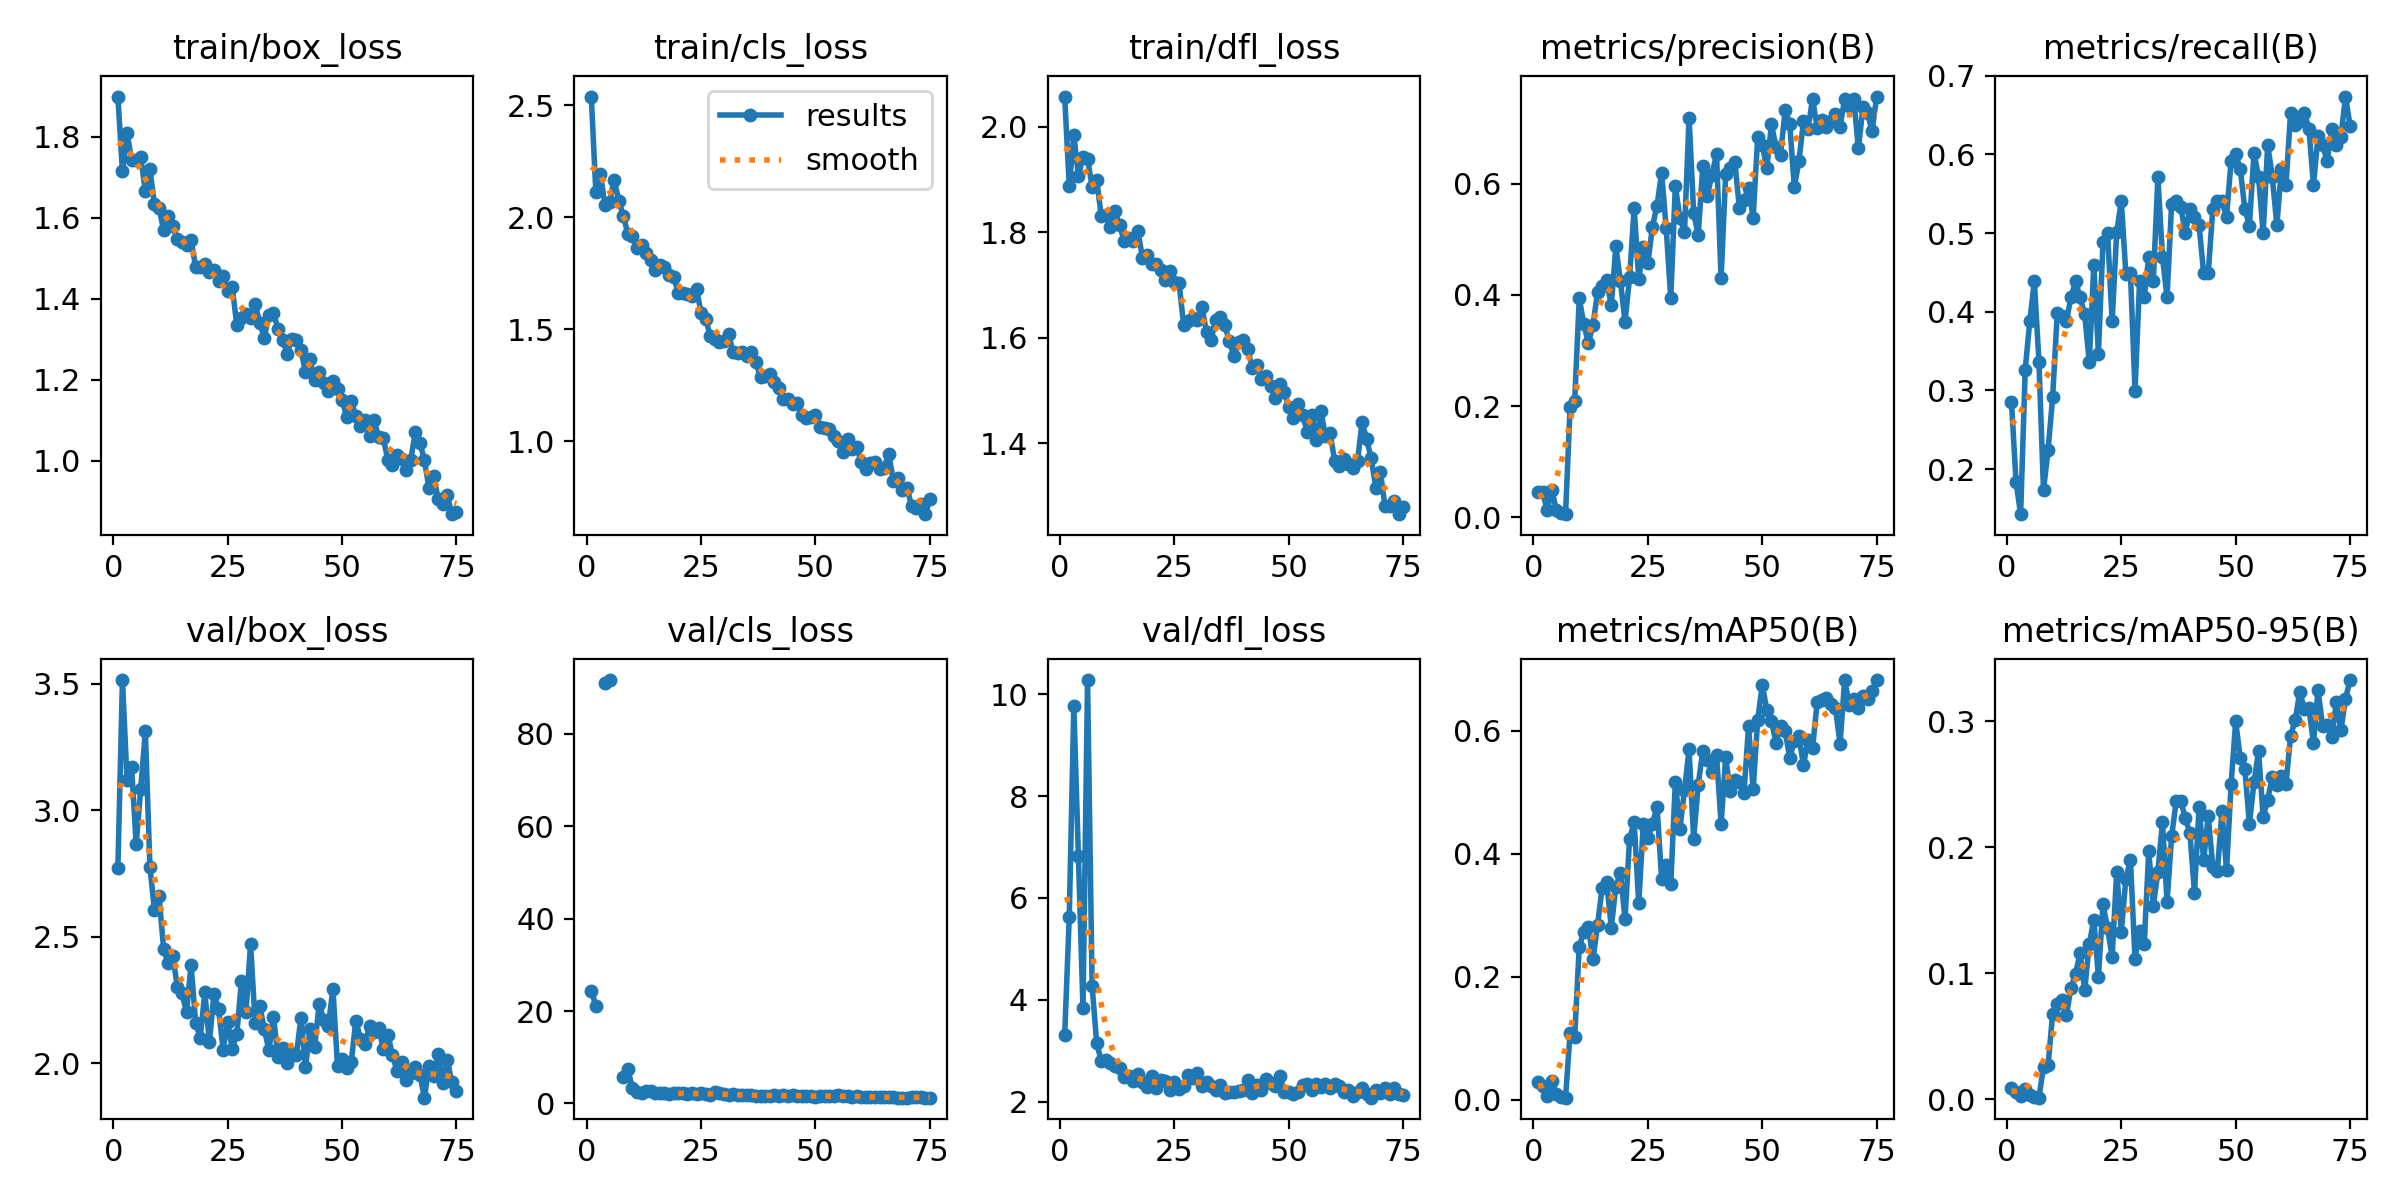

In [20]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/results.png', width = 600)

/content/Pothole


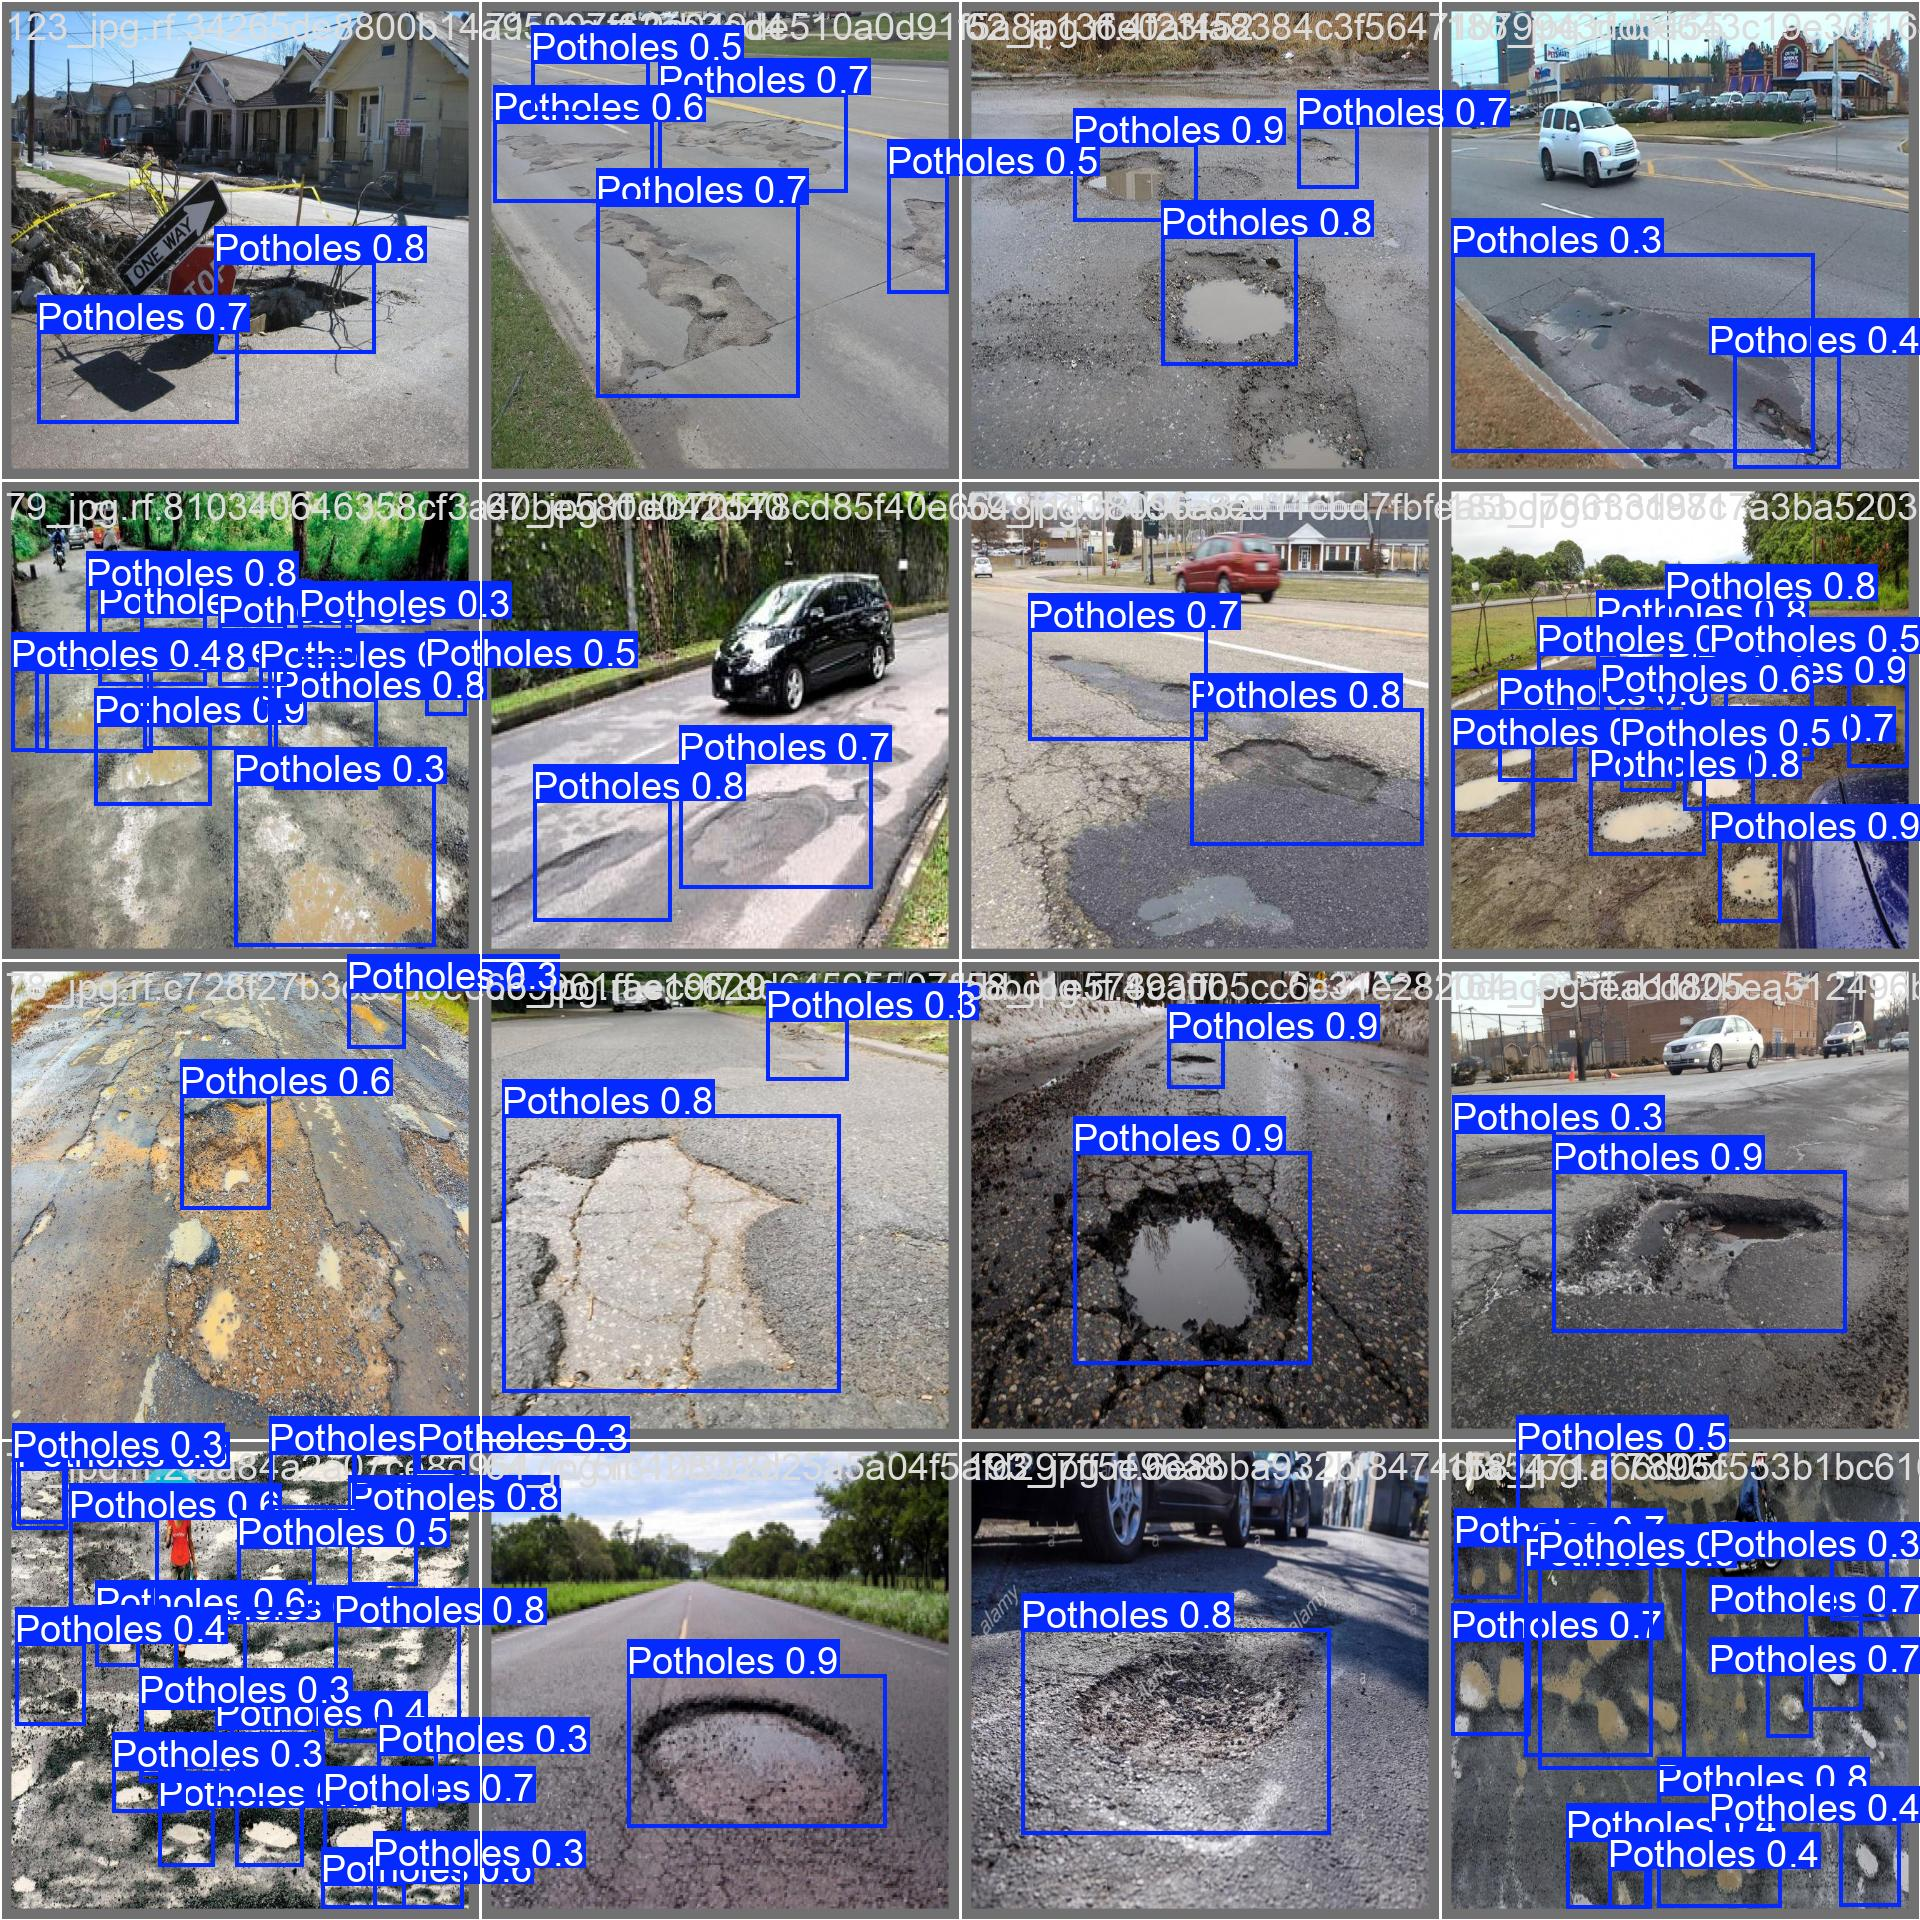

In [21]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 600)

In [22]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data="/content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/data.yaml"

/content/Pothole
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.10it/s]
                   all         20         98      0.757      0.637      0.682      0.331
Speed: 0.3ms preprocess, 33.5ms inference, 0.0ms loss, 36.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/test/images"

/content/Pothole
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/test/images/106_jpg.rf.12693aed3783446751b93aeb94d8bafe.jpg: 640x640 8 Potholess, 37.0ms
image 2/20 /content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/test/images/111_jpg.rf.91472dc665da666b10d8fa58d88463aa.jpg: 640x640 7 Potholess, 37.0ms
image 3/20 /content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/test/images/131_jpg.rf.f49fe5d93fab29363b8b04f6b89d5330.jpg: 640x640 10 Potholess, 37.0ms
image 4/20 /content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/test/images/142_jpg.rf.ef9f025b2536187f2dbbbdb80bc8bfb1.jpg: 640x640 1 Potholes, 36.9ms
image 5/20 /content/Pothole/datasets/Object-Detection-(Bounding-Box)-1/test/images/150_jpg.rf.7808eb72654e8521bb8b25743c94bbc4.jpg: 640x640 2 Potholess, 28.2ms
image 6/20 /conte

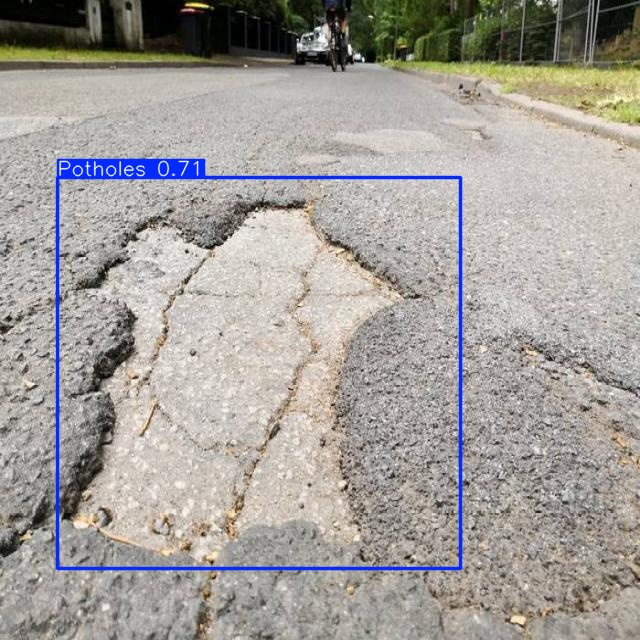

In [24]:
Image('/content/Pothole/runs/detect/predict/142_jpg.rf.ef9f025b2536187f2dbbbdb80bc8bfb1.jpg')